In [1]:
import sys
import pandas as pd
import torch

import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda:0")

In [2]:
from utils_viz import viz_small_results, viz_big_results

In [3]:
sys.path.insert(0, "models/")

# Imports for baseline models
from UNet_PD import (UNet_Baseline, UNet_Dilated, 
                     UNet_Original, UNet_ProgressiveDilated, 
                     UNet_Original_with_BatchNorm)

from ENet import ENet

# Imports for Bi-LSTM and Temporal models
from UNet_recurrent import (RNN_UNet_Config1, RNN_UNet_Config1_1, 
                            RNN_UNet_Config2, RNN_Dilated_UNet_with_hollow_kernels)

from UNet_temporal import (Temporal_UNet_Config1_1, Temporal_UNet_Config1_2, 
                           Temporal_UNet_Config1_3, Temporal_UNet_Config2_2, Temporal_UNet_Config2_3)

# Imports for tiny U-Net models
from unet_NxN_BN import UNet_20x20 as UNet_20x20_withBN
from unet_NxN import UNet_20x20 as UNet_20x20_noBN

from unet_NxN_BN import UNet_40x40 as UNet_40x40_withBN
from unet_NxN import UNet_40x40 as UNet_40x40_noBN

# Imports for Hollow Kernel U-Net Approach 1
from UNet_Hollow_Kernels_A1 import UNet_config1, UNet_config2, UNet_config3_withMish

# Imports for Hollow Kernel U-Net Approach 2
from UNet_Hollow_Kernels_A2_Congig1 import UNet_Dilated_config1
from UNet_Hollow_Kernels_A2_Congig2 import (UNet_Dilated_2levels_config1, 
                                        UNet_Dilated_2levels_config2, 
                                        UNet_Dilated_2levels_config3)
from UNet_Hollow_Kernels_A2_Congig3 import (UNet_Dilated_3levels_config1, 
                                            UNet_Dilated_3levels_config2, 
                                            UNet_Dilated_3levels_config3)


### Models initialization

In [4]:
### Model 1: A1 Config. 1.1 L1
folder = "../unet_with_hollow_kernels/weights_folder_exp15.04.2020/exp3/"

model_kernel_1 = UNet_20x20_withBN(1, 32)
model_kernel_1 = model_kernel_1.to(device)
model_kernel_1.load_state_dict(torch.load(folder + "weight_unet20x20.epoch_446_train.pth",
                                          map_location="cpu"))

model_1 = UNet_config1(3)
model_1 = model_1.to(device)
model_1.load_state_dict(torch.load(folder + "weight.epoch_446_loss_train_0.15564870654622023.pth",
                                          map_location="cpu"))

### Model 2: A1 Config. 1.1 L2
folder = "../unet_with_hollow_kernels/weights_folder_exp15.04.2020/exp1/"

model_kernel_2 = UNet_20x20_noBN(1, 32)
model_kernel_2 = model_kernel_2.to(device)
model_kernel_2.load_state_dict(torch.load(folder + "weight_unet20x20.epoch_450_train.pth",
                                          map_location="cpu"))

model_2 = UNet_config1(3)
model_2 = model_2.to(device)
model_2.load_state_dict(torch.load(folder + "weight.epoch_450_loss_train_0.07956408768923903.pth",
                                          map_location="cpu"))

### Model 3: A1 Config. 1.1 L3
folder = "../unet_with_hollow_kernels/weights_folder_exp18.05.2020/exp2.2/"

model_kernel_3 = UNet_20x20_withBN(1, 32)
model_kernel_3 = model_kernel_3.to(device)
model_kernel_3 = torch.nn.DataParallel(model_kernel_3, device_ids=[0, 1])
model_kernel_3.load_state_dict(torch.load(folder + "weight_unet20x20.epoch_581_train.pth",
                                          map_location="cpu"))
model_kernel_3.eval()
model_kernel_3 = model_kernel_3.module.to(device)

model_3 = UNet_config1(3)
model_3 = model_3.to(device)
model_3 = torch.nn.DataParallel(model_3, device_ids=[0, 1])
model_3.load_state_dict(torch.load(folder + "weight.epoch_581_loss_train_0.102897002724084.pth",
                                          map_location="cpu"))
model_3.eval()
model_3 = model_3.module.to(device)

### Model 4: A2 Config. 1.1
model_4 = UNet_Dilated_config1(3, 10)
folder = "../hollow_kernels_opt/weights_folder_21.05.20/UNet_Dilated_config1_28.05.2020.04:04/"
model_4.load_state_dict(torch.load(folder + 'weight.epoch_161_loss_train_0.17352727113559008.pth',
                                 map_location="cpu"))
model_4.eval()

### Model 5: A2 Config. 2.1
model_5 = UNet_Dilated_2levels_config1(3)
folder = "../hollow_kernels_opt/weights_folder_2levels/UNet_Dilated_2levels_config1_25.05.2020.21:54/"
model_5.load_state_dict(torch.load(folder + 'weight.epoch_429_loss_val_0.36406558683837753.pth',
                                 map_location="cpu"))
model_5.eval()

### Model 6: A2 Config. 2.2
model_6 = UNet_Dilated_2levels_config2(3)
folder = "../hollow_kernels_opt/weights_folder_2levels/UNet_Dilated_2levels_config2_25.05.2020.21:56/"
model_6.load_state_dict(torch.load(folder + 'weight.epoch_349_loss_val_0.38965363200888575.pth',
                                 map_location="cpu"))
model_6.eval()

### Model 7: A2 Config. 2.3
model_7 = UNet_Dilated_2levels_config3(3)
folder = "../hollow_kernels_opt/weights_folder_2levels/UNet_Dilated_2levels_config3_28.05.2020.03:59/"
model_7.load_state_dict(torch.load(folder + 'weight.epoch_632_loss_train_0.18942452591918682.pth',
                                 map_location="cpu"))
model_7.eval()

### Model 8: A2 Config. 3.1
model_8 = UNet_Dilated_3levels_config1(3)
folder = "../hollow_kernels_opt/weights_folder_3levels/UNet_Dilated_3levels_config1_28.05.2020.03:48/"
model_8.load_state_dict(torch.load(folder + 'weight.epoch_318_loss_val_0.39542187046124994.pth',
                                 map_location="cpu"))
model_8.eval()

UNet_Dilated_3levels_config1(
  (model): UNet_Dilated(
    (model): UNet(
      (conv_down): ModuleList(
        (0): ConvBlock(
          (conv_layers): ModuleList(
            (0): Conv2d(1, 32, kernel_size=(10, 10), stride=(1, 1), padding=(4, 4), bias=False)
            (1): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), padding=(5, 5), dilation=(3, 3))
          )
          (batchnorm_layers): ModuleList(
            (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (activation): PReLU(num_parameters=1)
        )
        (1): ConvBlock(
          (conv_layers): ModuleList(
            (0): Conv2d(32, 128, kernel_size=(10, 10), stride=(2, 2), padding=(8, 8), dilation=(2, 2), bias=False)
            (1): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1), padding=(5, 5), dilation=(3, 3))
          )
          (batchnorm_layers): 

In [5]:
### Models dict
models_and_kernels = {
    "A1 Config. 1.1 L1":{
        "model": model_1,
        "kernel": model_kernel_1
    },
    "A1 Config. 1.1 L2":{
        "model": model_2,
        "kernel": model_kernel_2
    },
    "A1 Config. 1.1 L3":{
        "model": model_3,
        "kernel": model_kernel_3
    }
}

models_A2 = {
    "A2 Config. 1.1": model_4,
    "A2 Config. 2.1": model_5,
    "A2 Config. 2.2": model_6,
    "A2 Config. 2.3": model_7,
    "A2 Config. 3.1": model_8,
}

In [6]:
models = {

    "U-Net": UNet_Original_with_BatchNorm(in_channels=1, out_channels=3), ##with BN
    "U-Net Baseline": UNet_Baseline(in_channels=1, out_channels=3),
    "U-Net Dilated": UNet_Dilated(in_channels=1, out_channels=3),
    "U-Net PD": UNet_ProgressiveDilated(in_channels=1, out_channels=3),
    "E-Net": ENet(in_channels=1, num_classes=3),
    "Temporal U-Net": Temporal_UNet_Config1_3(t_shift=9, model="Original", kernel_size=3),
    "Bi-LSTM U-Net": RNN_UNet_Config1_1(model="Original", kernel_size=3),
    "Bi-LSTM Hollow \nKernels U-Net": RNN_Dilated_UNet_with_hollow_kernels(kernel_size=3, num_layers=2),
}

weights_paths = {
    "U-Net": "../unet_progressive/weights_folder_new_split/UNet_Original_with_BatchNorm_06.03.2020.01:38/weight.epoch_549_loss_train_0.29457011019641705.pth",
    "U-Net Baseline": "../unet_progressive/weights_folder_new_split/UNet_Baseline_05.03.2020.14:06/weight.epoch_473_loss_train_0.464676417816769.pth",
    "U-Net Dilated": "../unet_progressive/weights_folder_new_split/UNet_Dilated_06.03.2020.15:51/weight.epoch_191_loss_train_0.26755036860704423.pth",
    "U-Net PD": "../unet_progressive/weights_folder_new_split/UNet_ProgressiveDilated_09.03.2020.01:29/weight.epoch_441_loss_train_0.28314261775125155.pth",
    "E-Net": "../enet/weights_folder_new_split/ENet_06.03.2020.00:15/weight.epoch_118_loss_train_0.40464761636473917.pth",
    "Temporal U-Net": "../unet_temporal/weights_folder_new_split/Temporal_UNet_Config1_3_13.03.2020.01:50/weight.epoch_80_loss_train_0.3180189067653937.pth",
    "Bi-LSTM U-Net": "../unet_recurrent/weights_folder_from_cig5/RNN_UNet_Config1_1_10.03.2020.22:01/weight.epoch_64_loss_val_0.5018339690541481.pth",
    "Bi-LSTM Hollow \nKernels U-Net": "../unet_recurrent/weights_folder_02.06.20/RNN_Dilated_UNet_with_hollow_kernels_05.06.2020.02:52/weight.epoch_49_loss_train_0.2221870011354288.pth"
}

In [7]:
for model_name in models.keys():
    models[model_name].load_state_dict(torch.load(weights_paths[model_name], map_location="cpu"))
    models[model_name].eval()

### Load data

In [8]:
df = pd.read_csv("../data/dataframes/patients_data.csv")

### Results: vizualization #1

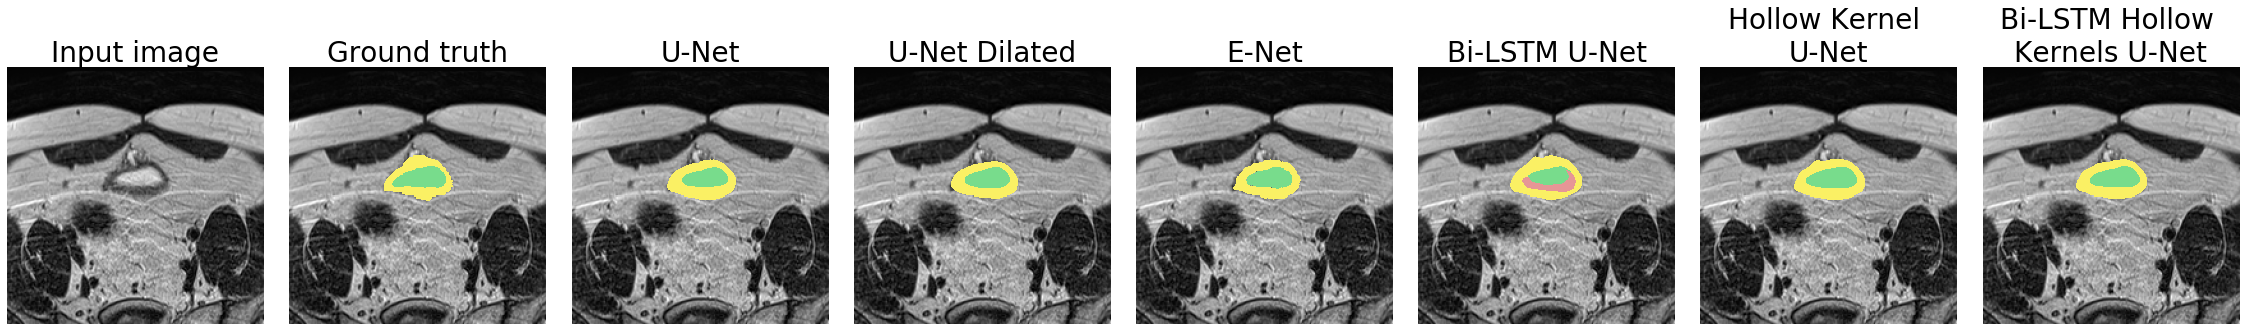

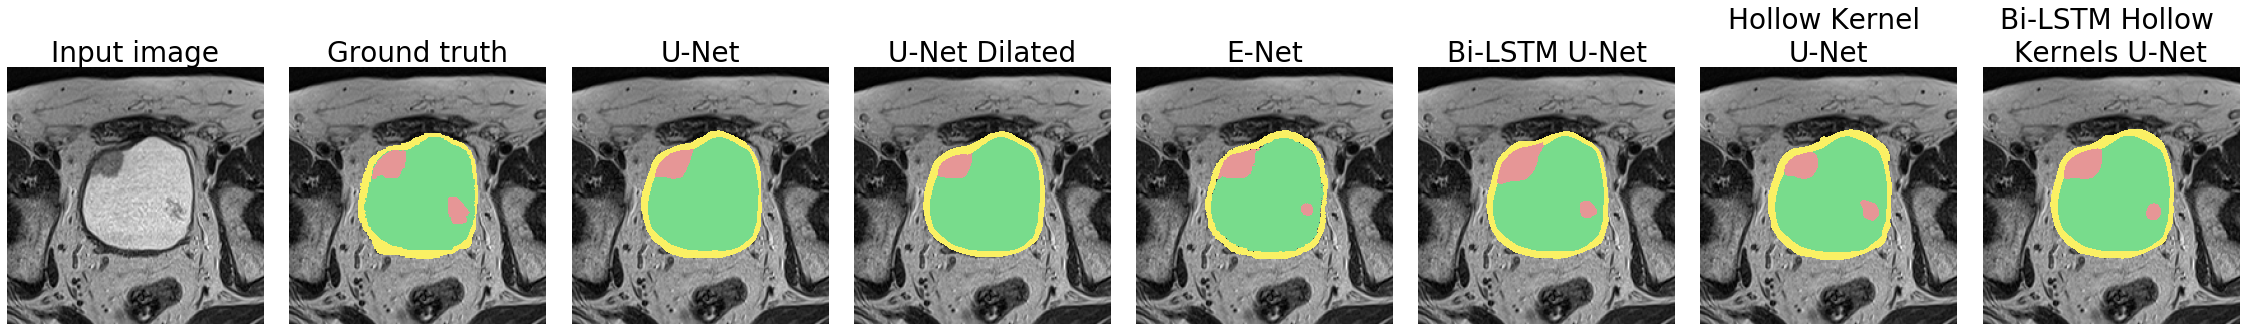

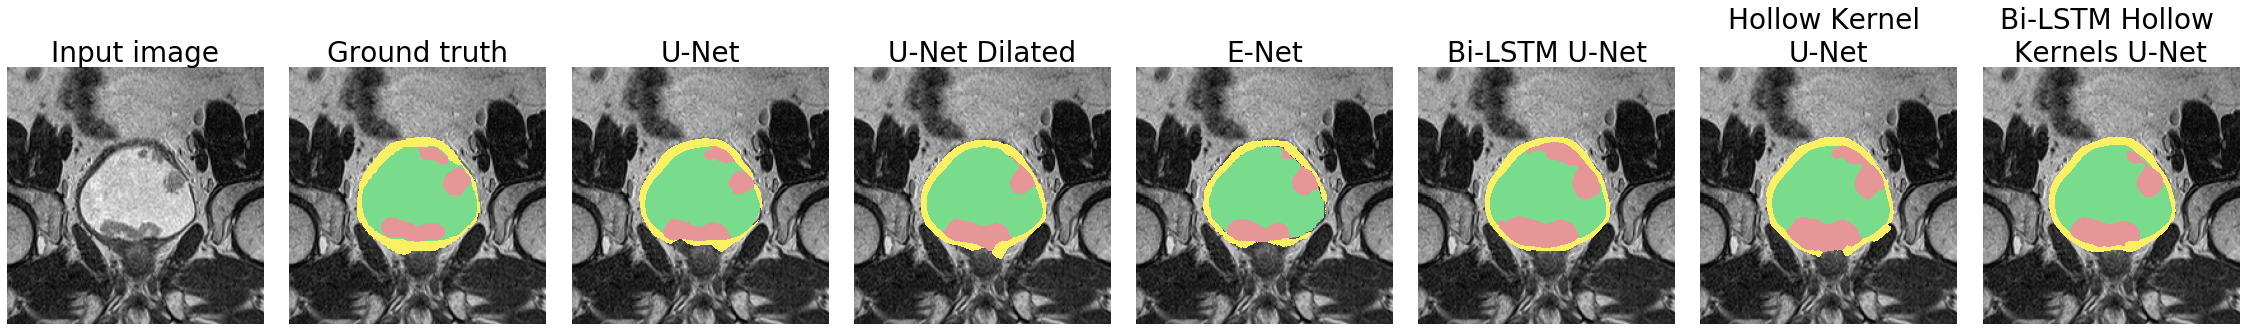

In [9]:
for c in df.index:
    
    viz_small_results(df, c, models, models_A2, device=device)

### Results: vizualization #2

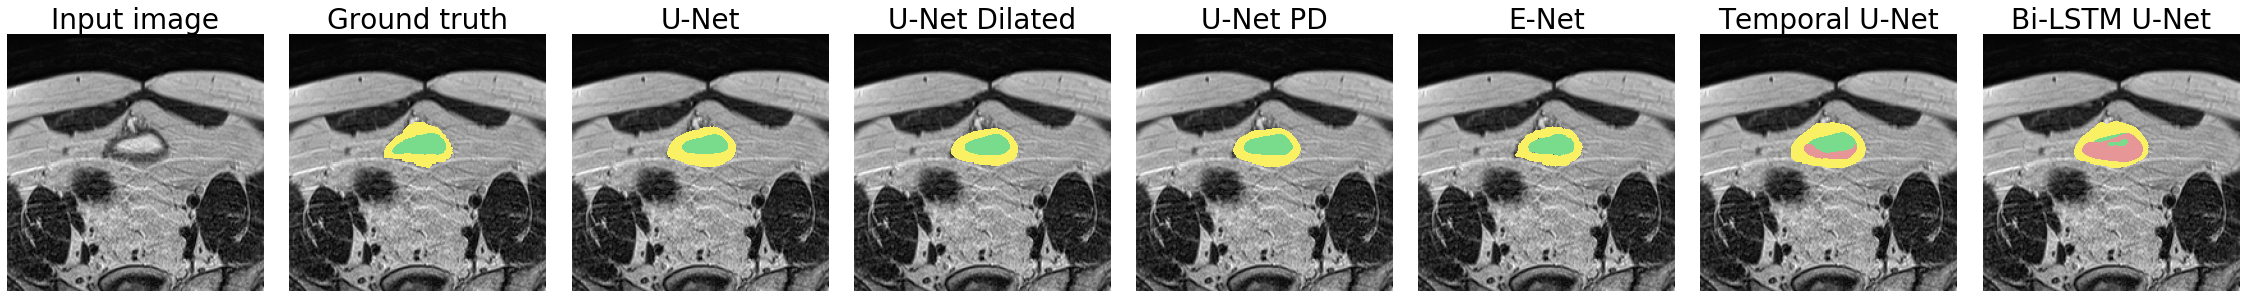

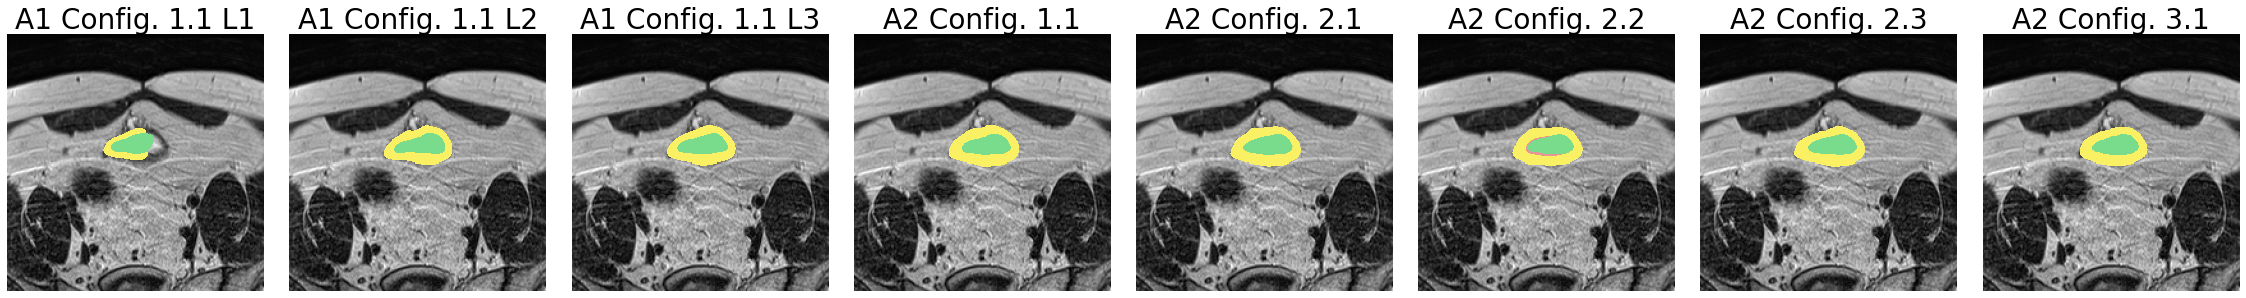

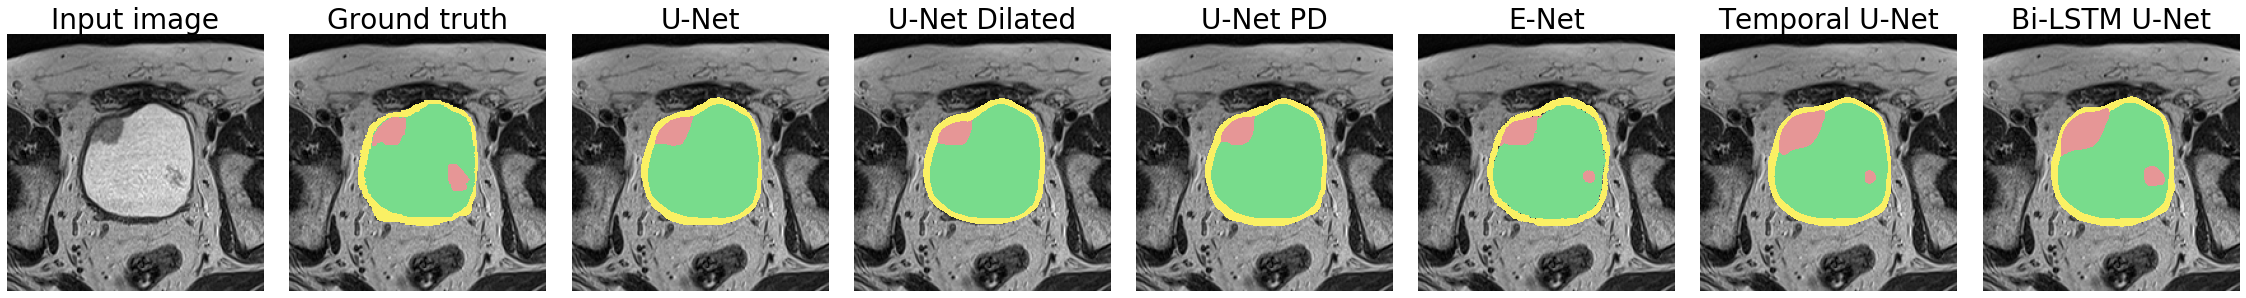

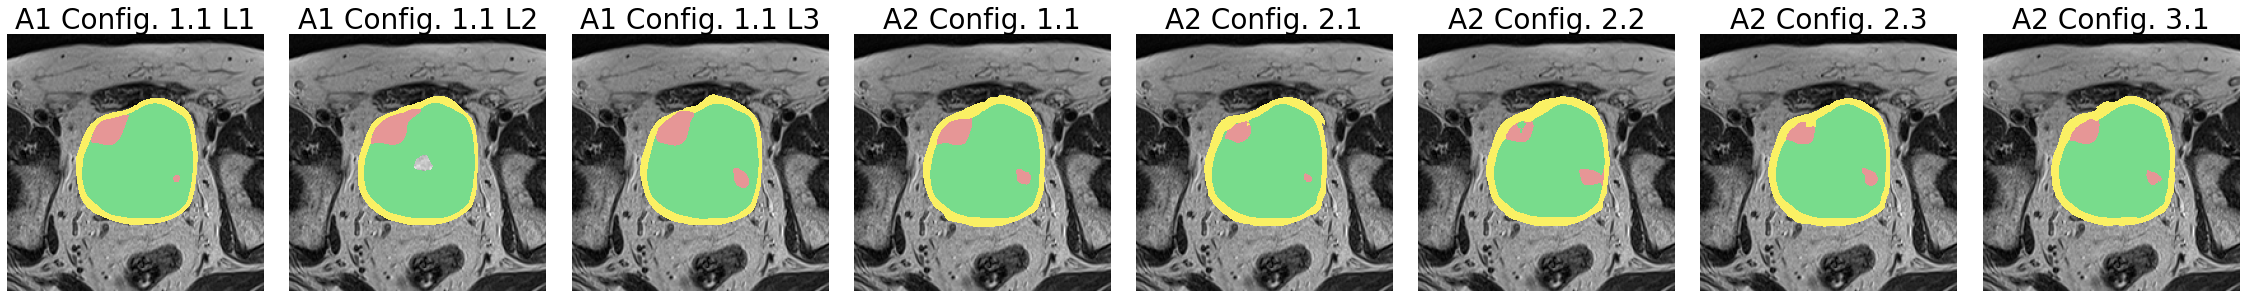

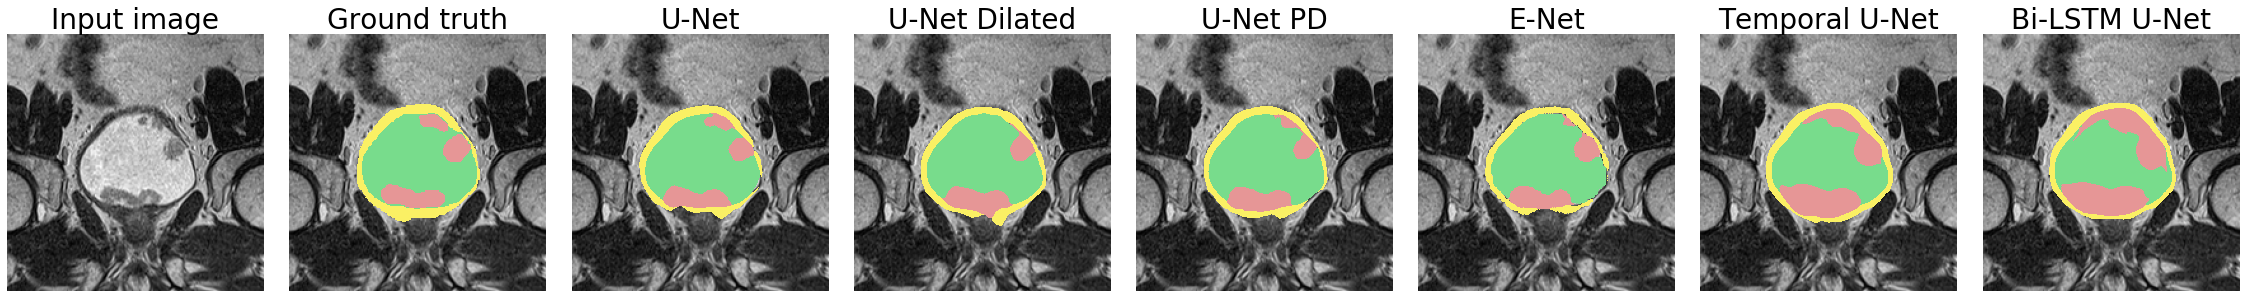

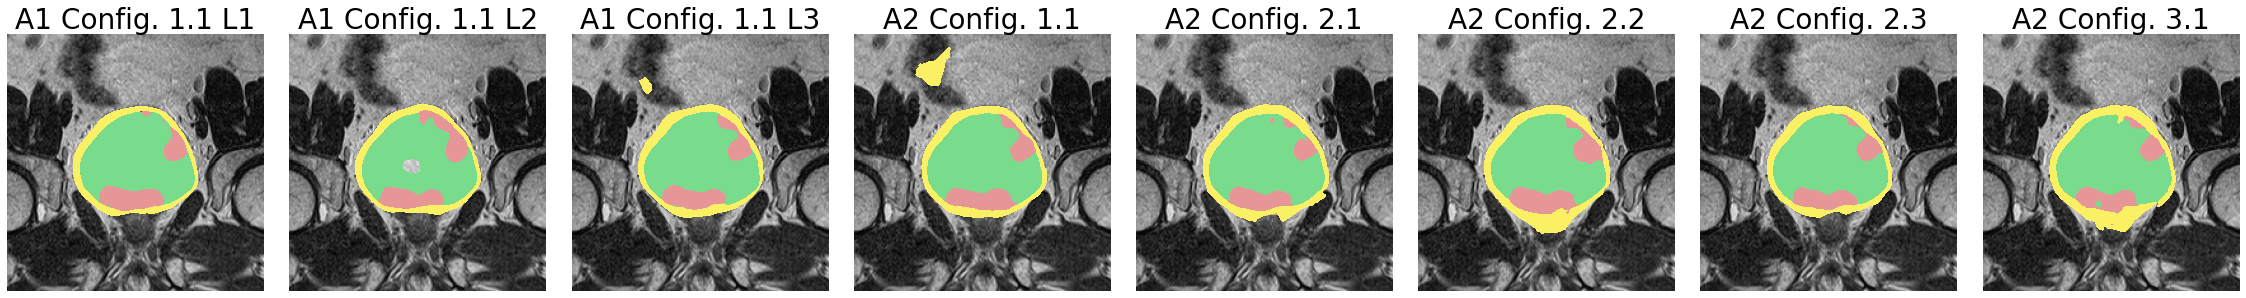

In [10]:
for c in df.index:

    viz_big_results(df, c, models, models_and_kernels, models_A2, device)